# Assignment 4 - Titanic passenger dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Basic Information

In [2]:
df = pd.DataFrame(pd.read_csv('train.csv', header=0))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### This pie chart shows how many people survived

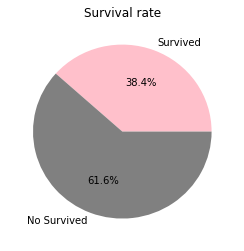

0    549
1    342
Name: Survived, dtype: int64

In [4]:
Num_survived = df['Survived'].sum()
Num_no_survived = 891 - Num_survived
plt.figure(figsize = (4,4))
plt.subplot(111)

sizes = [Num_survived, Num_no_survived]
plt.pie(sizes, colors=["pink","gray"], labels=['Survived','No Survived'],autopct='%1.1f%%')
plt.title('Survival rate') 

plt.show()

df.Survived.value_counts()

 ### From this chart we kan see, in this 891 passengers, more than 60% of them were not survived.

## 1. Age

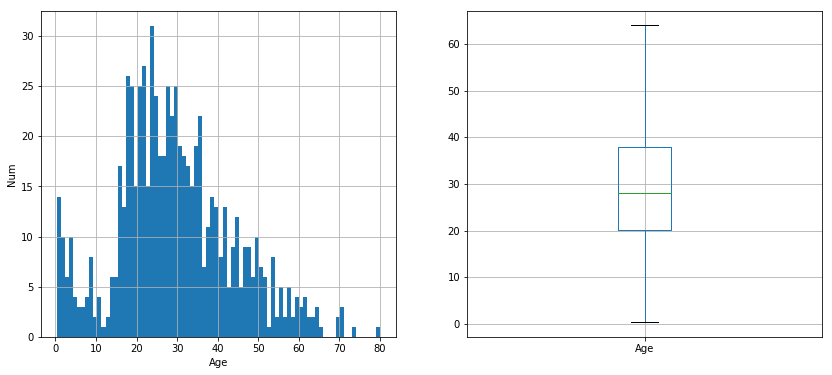

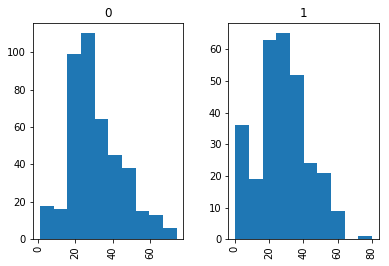

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [5]:
plt.figure(figsize=(14,6))
plt.subplot(121)
df['Age'].hist(bins = 80)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
df.boxplot(column='Age', showfliers=False)

plt.show()

df.hist("Age", "Survived")
plt.show()

df.groupby("Survived")["Age"].describe()

### The try to find out the chances of survival from a passenger's age

In [6]:
df["Old"] = df["Age"] >= 65
df["Child"] = df["Age"] <= 12

In [7]:
pd.crosstab(df.Survived, df.Old)

Old,False,True
Survived,,
0,539,10
1,341,1


In [8]:
pd.crosstab(df.Survived, df.Child)

Child,False,True
Survived,,
0,520,29
1,302,40


### Divide passengers into three categories: Child, Adult and Old

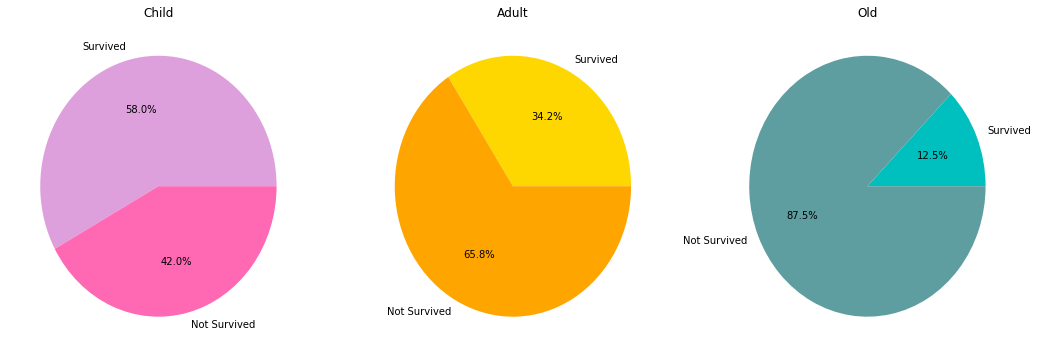

In [9]:
ChildSurv = df.loc[(df["Survived"] == 1) & (df["Age"] <= 12)].Sex.count()
ChildNosurv = df.loc[(df["Survived"] == 0) & (df["Age"] <= 12)].Sex.count()

OldSurv = df.loc[(df["Survived"] == 1) & (df["Age"] > 65)].Sex.count()
OldNosurv = df.loc[(df["Survived"] == 0) & (df["Age"] > 65)].Sex.count()

AdultSurv = df.loc[(df["Survived"] == 1) & (df["Age"][12:65])].Sex.count()
AdultNosurv = df.loc[(df["Survived"] == 0) & (df["Age"][12:65])].Sex.count()

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.pie([ChildSurv, ChildNosurv], colors=["plum","hotpink"], labels=['Survived', 'Not Survived'], autopct='%1.1f%%')
plt.title('Child') 

plt.subplot(132)
plt.pie([AdultSurv, AdultNosurv], colors=["gold","orange"], labels=['Survived', 'Not Survived'], autopct='%1.1f%%',)
plt.title('Adult') 

plt.subplot(133)
plt.pie([OldSurv, OldNosurv], colors=["c","cadetblue"], labels=['Survived', 'Not Survived'], autopct='%1.1f%%',)
plt.title('Old') 

plt.show()

### The chart shows that the biggest chance to be survive belongs to children, over 40% of childern were survived. Then is the adults, the least chance was given to the elderly, only 12.5% people over 65 years old survived.

## 2. FamilySize

In [10]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Old,Child,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,False,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False,False,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,True,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False,False,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False,False,2


In [11]:
pd.crosstab(df["FamilySize"],df["Survived"])

Survived,0,1
FamilySize,,
1,374,163
2,72,89
3,43,59
4,8,21
5,12,3
6,19,3
7,8,4
8,6,0
11,7,0


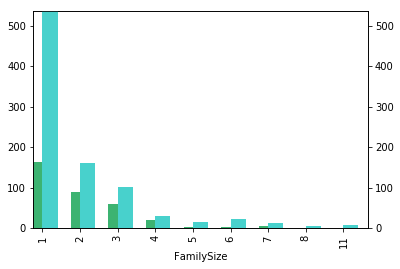

,Survived,FamilySize,PassengerNum,Ratio
FamilySize,,,,
1,163,1,537,30.353818
2,89,2,161,55.279503
3,59,3,102,57.843137
4,21,4,29,72.413793
5,3,5,15,20.000000
6,3,6,22,13.636364
7,4,7,12,33.333333
8,0,8,6,0.000000
11,0,11,7,0.000000


In [12]:
FS = pd.DataFrame()

FS['Survived'] = df[['Survived','FamilySize']].groupby(['FamilySize'])['Survived'].sum()
FS['FamilySize'] = FS.index.values
FS['PassengerNum'] = df[['FamilySize','Survived']].groupby(['FamilySize'])['Survived'].count()
FS['Ratio'] = FS.Survived / FS.PassengerNum * 100

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

FS.Survived.plot(kind='bar', color='mediumseagreen', ax=ax)
FS.PassengerNum.plot(kind='bar', color='mediumturquoise', ax=ax2, width=width, position=0)

ax.set_ylim(0,max(FS.PassengerNum))
ax2.set_ylim(0,max(FS.PassengerNum))
ax.set_xlabel('FamilySize')

plt.show()

FS

### This chart shows that most people travel alone, but the biggest chance to survive went to people from families of 4, over 70% of this kind of famliy survived. What's more, people from families of 3 and 4 also have large chance to survive, the percentage up to 50%. In the end, almost no biggest family members survived.

## 3. Gender

577 314


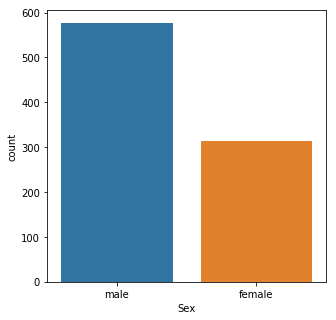

Survived,0,1
Sex,,
female,81,233
male,468,109


In [13]:
male_num = df['Sex'][df['Sex'] == 'male'].count()
female_num = df['Sex'][df['Sex'] == 'female'].count()
plt.figure(figsize=(5,5))
print(male_num,female_num)

sns.countplot(x='Sex', data=df)

plt.show()

pd.crosstab(df["Sex"],df["Survived"])

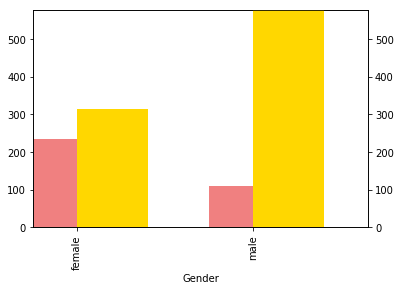

,Survived,Sex,PassengerNum,Ratio
Sex,,,,
female,233,female,314,74.203822
male,109,male,577,18.890815


In [14]:
Gen = pd.DataFrame()

Gen['Survived'] = df[['Survived','Sex']].groupby(['Sex'])['Survived'].sum()
Gen['Sex'] = Gen.index.values
Gen['PassengerNum'] = df[['Sex','Survived']].groupby(['Sex'])['Survived'].count()
Gen['Ratio'] = Gen.Survived / Gen.PassengerNum * 100

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

Gen.Survived.plot(kind='bar', color='lightcoral', ax=ax)
Gen.PassengerNum.plot(kind='bar', color='gold', ax=ax2, width=width, position=0)

ax.set_ylim(0,max(Gen.PassengerNum))
ax2.set_ylim(0,max(Gen.PassengerNum))
ax.set_xlabel('Gender')

plt.show()

Gen

### From the chart, we can see that the total number of male is almost double female, but only 18% of male were survived.The number of female survivor is almost double male's, and 74% of famale were survived.

## 4.Pclass

In [15]:
pd.crosstab(df["Pclass"],df["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


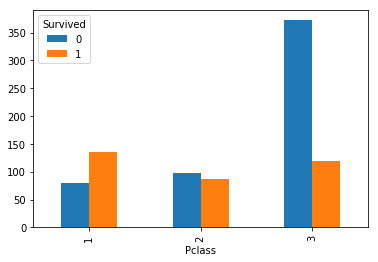

In [16]:
pd.crosstab(df["Pclass"],df["Survived"]).plot(kind="bar")
plt.show()

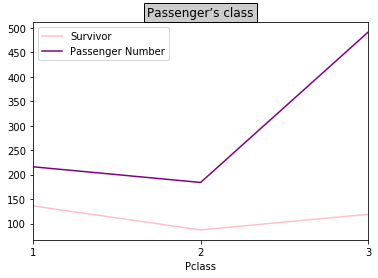

In [17]:
pf = pd.DataFrame()
pf['PassengerNum'] = df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].count()
pf['Pclass'] = pf.index.values
pf['Survived'] = df[['Pclass','Survived']].groupby(['Pclass'])['Survived'].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
pf.Survived.plot(kind='line', color='pink',ax=ax, label = 'Survivor', xticks = pf['Pclass'])
pf.PassengerNum.plot(kind='line', color='purple',ax=ax, label = 'Passenger Number')
ax.legend()
plt.title('Passenger’s class', bbox={'facecolor':'0.8', 'pad':3})

plt.show()

### The chart above shows that passengers in the higher class had higher suivival chance than others.

## 5. Fare

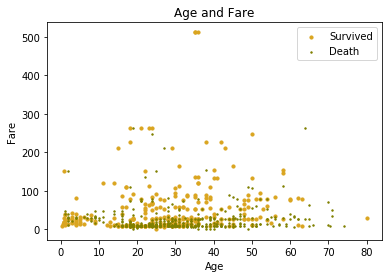

In [18]:
fig, f = plt.subplots()

x1 = df.Fare[df.Survived==1]
x2 = df.Fare[df.Survived==0]
y1 = df.Age[df.Survived==1]
y2 = df.Age[df.Survived==0]

f.set_xlabel('Age')
f.set_ylabel('Fare')
m = f.scatter(y1, x1, 10, 'goldenrod')
f.hold
n = f.scatter(y2, x2, 2, 'olive')
f.hold

f.legend([m,n],['Survived','Death'])
plt.title('Age and Fare')

plt.show()


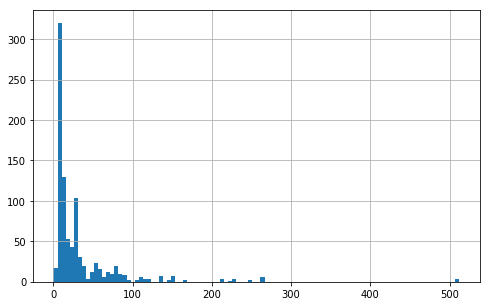

In [19]:
plt.figure(figsize=(8,5))
df['Fare'].hist(bins = 100)
plt.show()

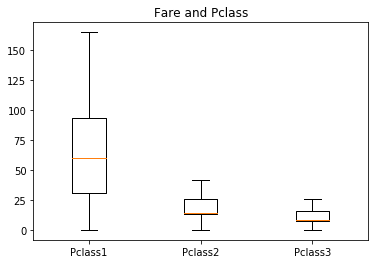

In [20]:
fig,FP = plt.subplots()
F1 = df.Fare[df.Pclass == 1]
F2 = df.Fare[df.Pclass == 2]
F3 = df.Fare[df.Pclass == 3]
plt.boxplot((F1,F2,F3),labels=("Pclass1","Pclass2","Pclass3"), showfliers=False)
FP.set_title("Fare and Pclass")

plt.show()

### The chart above shows that passengers who paid the higher fare had higher suivival chance than others.

## 6. Port of embarkation

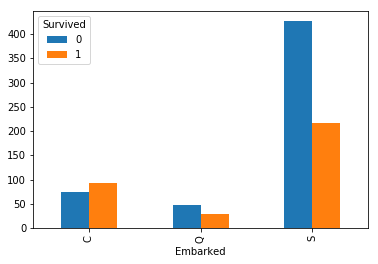

In [21]:
pd.crosstab(df["Embarked"],df["Survived"]).plot(kind="bar")
plt.show()

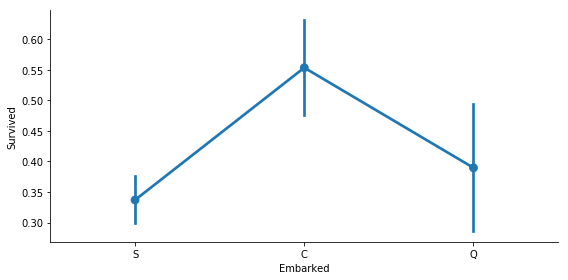

In [22]:
sns.factorplot('Embarked','Survived', data=df,size=4,aspect=2)    

plt.show()

### The highest chance to survived belongs to boarding C, followed by Q, S si the lowest.

## 7. Conclusion

### From analysis above, we can see that children, females, people with small families and in higher classes had more chance to survive.